In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

cars_df = pd.read_csv('cars.csv')
cars_df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [2]:
X = cars_df.km.values.reshape(-1,1)[:1000]
y = cars_df['current price'].values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)
model_to_comp = LinearRegression().fit(X_train, y_train)

score_train_to_compare_with_Lasso = model_to_comp.score(X_train, y_train)
score_test_to_compare_with_Lasso = model_to_comp.score(X_test, y_test)

model = LinearRegression().fit(X, y)

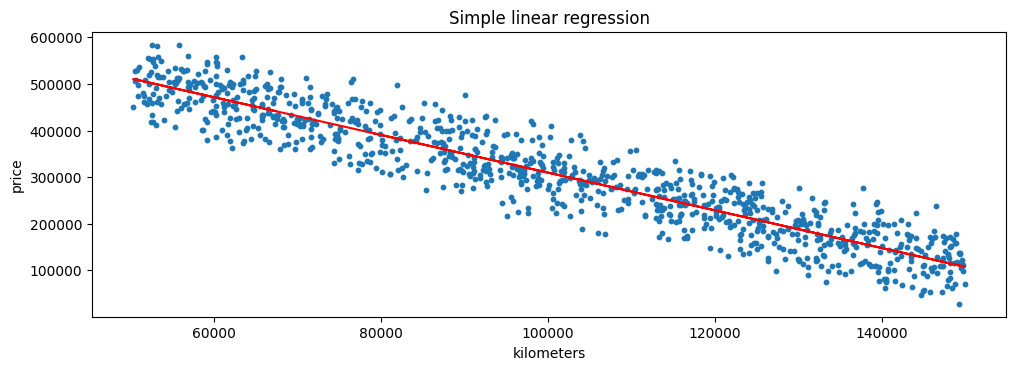

Mean squared error equals: 1969671528.3262599
0.8759541158503349


In [3]:
sc = model.score(X, y)
predict = model.predict(X)

plt.rcParams["figure.figsize"] = (11.8,3.7)
plt.scatter(X, y, s=10)
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(X, predict, color = "red")
plt.title("Simple linear regression")
plt.xlabel("kilometers")
plt.ylabel("price")
plt.show()
print("Mean squared error equals:", mean_squared_error(y, predict))
print(sc)


# From the chart we can see that price doesn't depend only on kilometers driven and not always less driven car means more expensive.
# It is producing errors for regression function. Because of that our regression function doesn't look fitted to all points
# even though it is fitted as good as possible.
# Our model score is almost 0.88, looking at the best possible score which is 1.0, our model is very good.

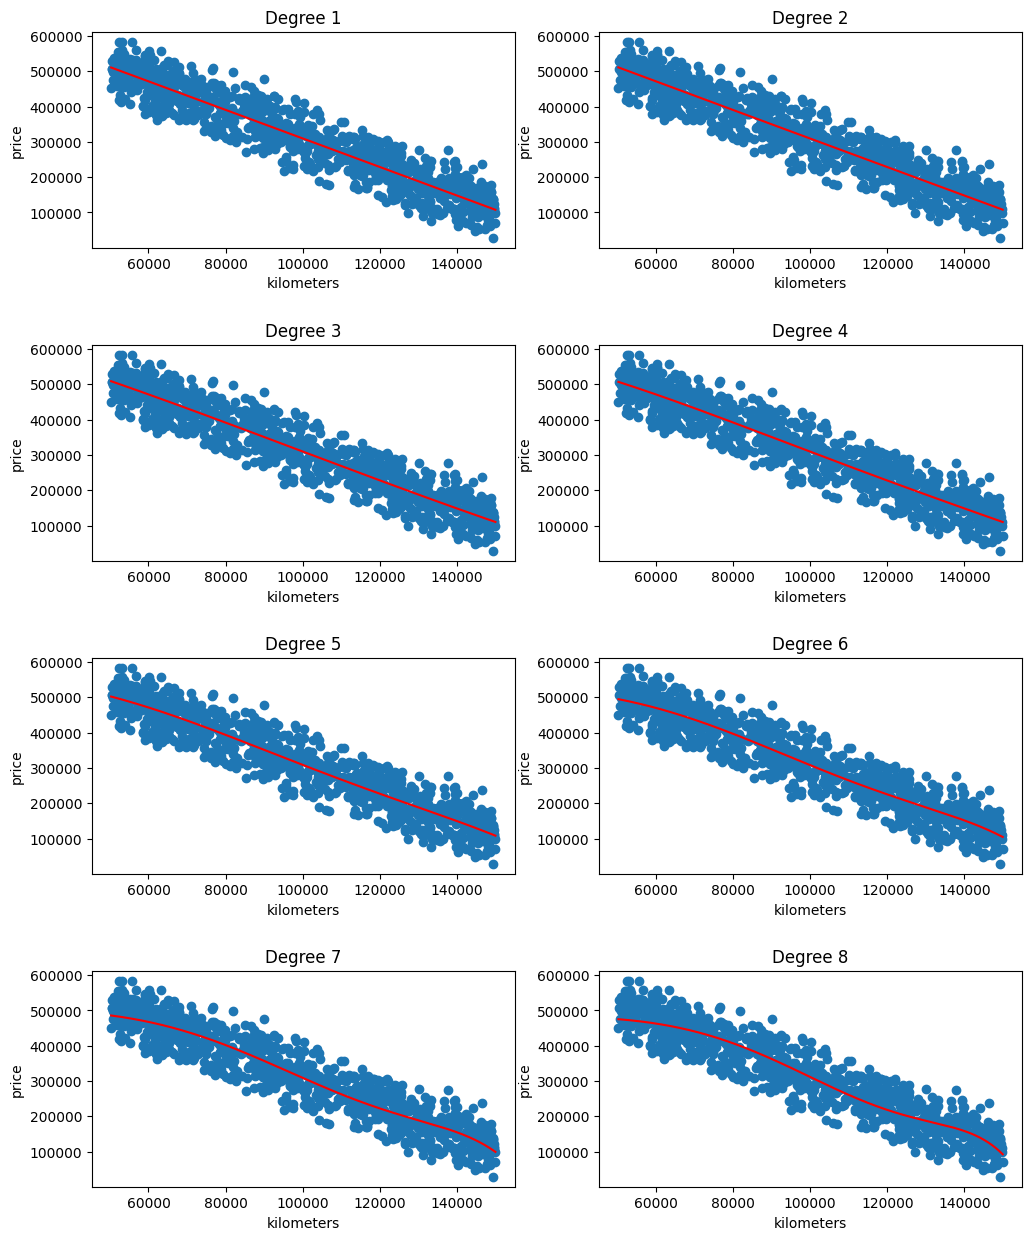

In [4]:
plt.figure(figsize=(12, 15))

X_fit = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
orderr, error = [], []

for order in range(1, 9):
    orderr.append(order)

    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model.fit(X_order, y)

    error.append(mean_squared_error(y, model.predict(X_order)))
    plt.subplot(4, 2, order)
    plt.subplots_adjust(hspace=0.45)
    plt.scatter(X, y)
    plt.plot(X_fit, model.predict(poly.fit_transform(X_fit)), color='r')
    plt.title(f'Degree {order}')
    plt.xlabel('kilometers')
    plt.ylabel('price')

plt.show()

# Charts below shows us how our polynomial regression model is behaving in next iterations. We can see that in next iterations
# our model is getting more curve shape and it fits worse.

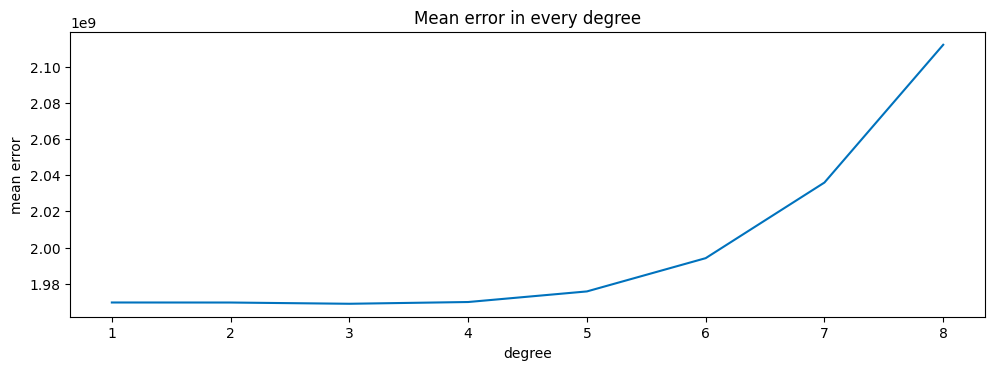

In [5]:
plt.xlabel('degree')
plt.ylabel('mean error')
plt.title("Mean error in every degree")
plt.plot(orderr, error, color=(0, 0.4470, 0.7410))
plt.show()

# Below we can see how our mean squared error changes in every iteration. We can clearly see that the greater degree we have,
# the higher error we get. It confirms what I mentioned in cell above, that model fits worse to cars_df in next iterations because
# mean error increases. In first 5 iterations error increases slow and then it starts to increase faster.

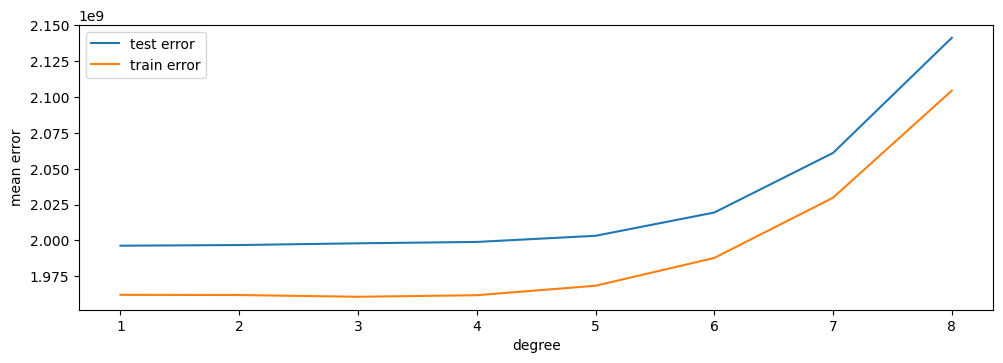

In [6]:
error1 = []
error2 = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    model_splitted = LinearRegression(fit_intercept=True)
    model_splitted.fit(X_train, y_train)

    error1.append(mean_squared_error(y_test, model_splitted.predict(X_test)))
    error2.append(mean_squared_error(y_train, model_splitted.predict(X_train)))

plt.plot(orderr, error1, label='test error')
plt.plot(orderr, error2, label='train error')
plt.xlabel('degree')
plt.ylabel('mean error')
plt.legend()
plt.show()

# Our cars_df is splitted into training and test samples. Then we compare these samples with mean squared errors.
# From the chart we can see that test error was on almost the same level in first five iterations but then it
# started to increase. We have very similar situation with train error where mean error was increasing after fourth iteration

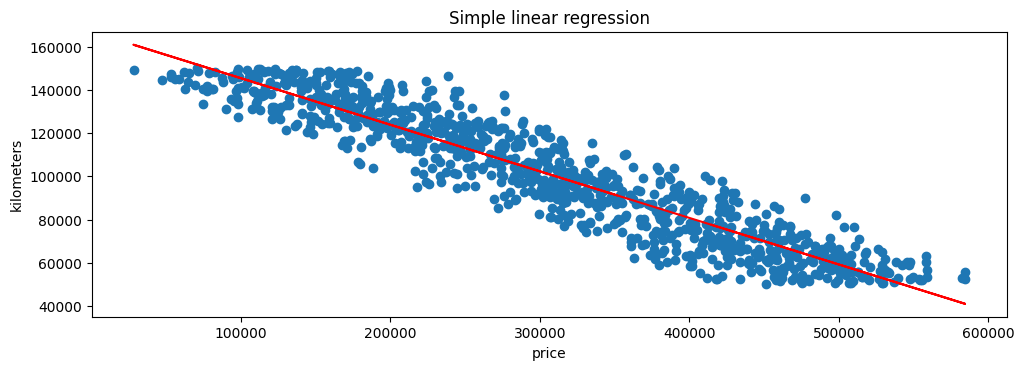

Mean squared error equals: 105359363.41330008


In [7]:
X = cars_df['current price'].values.reshape(-1,1)[:1000]
y = cars_df.km.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

new_model = LinearRegression()
new_model.fit(X_train, y_train)

plt.plot(X, X * new_model.coef_ + new_model.intercept_, "r")
plt.scatter(X, y)

plt.xlabel('price')
plt.ylabel('kilometers')
plt.title('Simple linear regression')
plt.show()

print("Mean squared error equals:", mean_squared_error(y, X * new_model.coef_ + new_model.intercept_))

# Here the exercise was to create model which will predict square footage of the apartments living space for price which was given.
# Charts shows the plotted predictions.

In [8]:
# Proposing model, which uses km, current price, years, hp and all of their interactions up to third degree

X = cars_df[['km', 'current price', 'years', 'hp']].values.reshape(-1,4)
y = cars_df['current price'].values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 14326.874783987585


In [9]:
#model 1:
X = cars_df[['km', 'current price', 'years', 'hp']].values.reshape(-1,4)
y = cars_df['current price'].values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=38)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 1522.0690438385243


In [10]:
#model 2:
X = cars_df[['km', 'current price', 'years', 'hp']].values.reshape(-1,4)
y = cars_df['current price'].values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=38)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 16331.737764831913


As shown above we can decrease mean squared error a little, so make our model more precise by simple changes in parameters
of function. Or as shown below we can use more columns from table and change parameters of function, but
we are getting similar results.

In [11]:
#model 3
X = cars_df[['km', 'current price', 'years', 'hp', 'condition']].values.reshape(-1,5)
y = cars_df['current price'].values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 2649.4377693706374


In [12]:
X = cars_df.km.values.reshape(-1,1)[:1000]
y = cars_df['current price'].values.reshape(-1,1)[:1000]
print(np.shape(X))
print(np.shape(y))

def predict(b, X):
    return X.dot(b)

def cost(y_pred, y_true):
    numerator = np.linalg.norm(y_pred - y_true)
    denominator = np.shape(y_true)[0]
    return np.float32((numerator*numerator)/denominator)

(1000, 1)
(1000, 1)


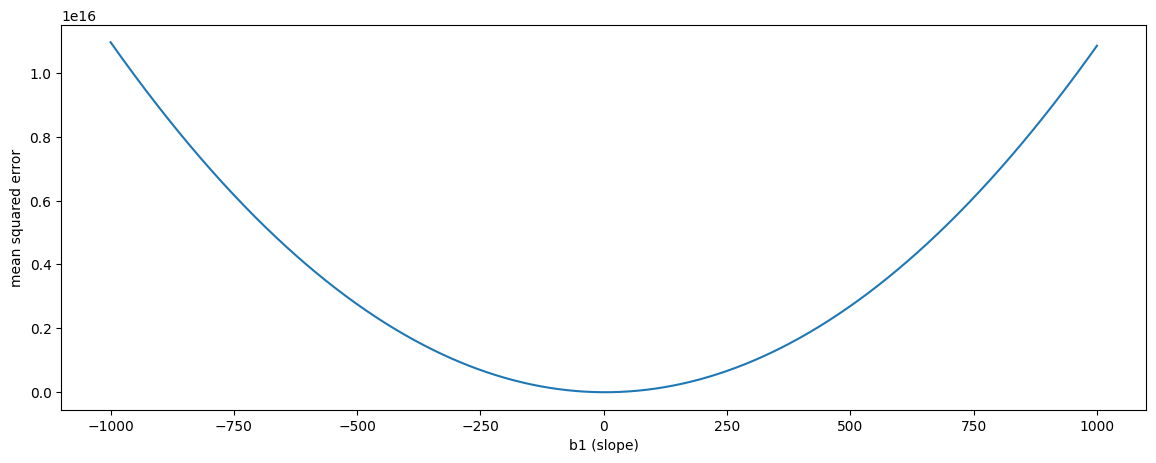

In [13]:
dict = {}
re = np.linspace(-1000, 1000, len(X))
for b in re:
  dict[b] = cost(predict(b, X), y)
X_linspace = np.linspace(0, 1000)
best_b1 = min(dict, key=dict.get)

plt.figure(figsize=(14, 5))

plt.plot(*zip(*sorted(dict.items())))
plt.xlabel('b1 (slope)')
plt.ylabel('mean squared error');

# Mean squared error is the smallest when the slope value is around 0

In [14]:
# standardize the feature matrix and returns it together with two vectors
# containing original features' means and standard deviations
def standardize(X):
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  return np.array([np.array(np.divide(np.subtract(x, mean), std)) for x in X]), mean, std

# estores the original data given standardized feature matrix X and vectors
# containing original features' means and standard deviations.
def destandardize(X, mean, std):
  return np.array([np.add(np.multiply(x, std), mean) for x in X])


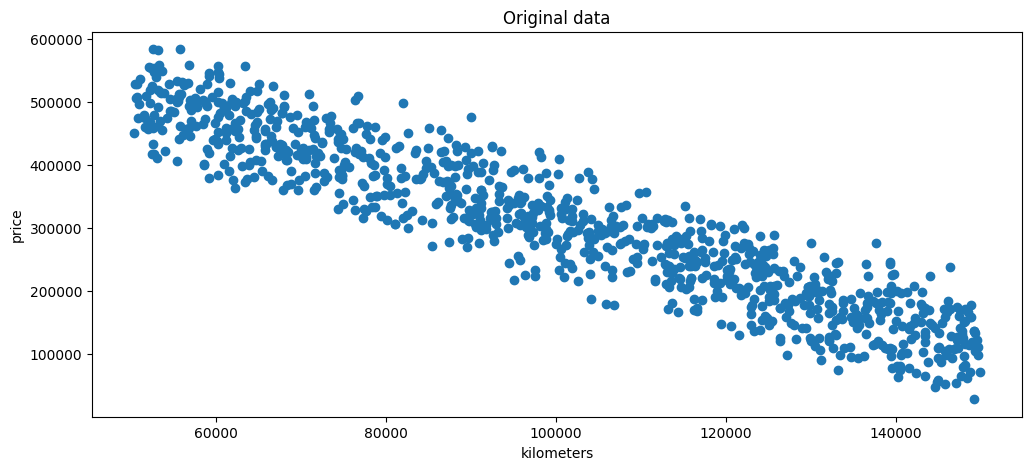

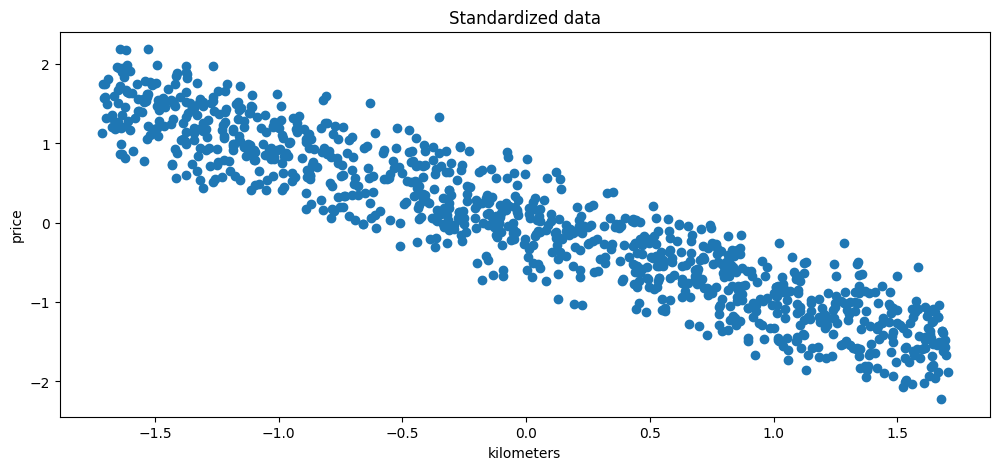

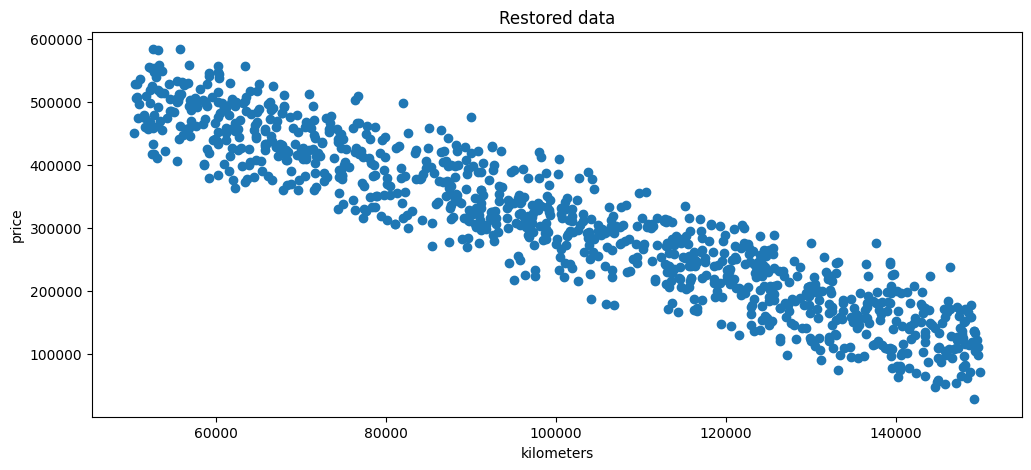

In [15]:
X = cars_df.km.values.reshape(-1,1)[:1000]
y = cars_df['current price'].values.reshape(-1,1)[:1000]

# original data X, y
plt.rcParams["figure.figsize"] = (12, 5)
plt.title("Original data")
plt.xlabel("kilometers")
plt.ylabel("price")
plt.scatter(X, y)
plt.show()

# data after standarization
plt.rcParams["figure.figsize"] = (12, 5)
plt.title("Standardized data")
plt.xlabel("kilometers")
plt.ylabel("price")
standarized_X, mean_x, standard_deviation_x = standardize(X.tolist())
standarized_y, mean_y, standard_deviation_y = standardize(y.tolist())
plt.scatter(standarized_X, standarized_y)
plt.show()

# data after destandarization
plt.rcParams["figure.figsize"] = (12, 5)
plt.title("Restored data")
plt.xlabel("kilometers")
plt.ylabel("price")
destandarized_X = destandardize(standarized_X, mean_x, standard_deviation_x)
destandarized_y = destandardize(standarized_y, mean_y, standard_deviation_y)
plt.scatter(destandarized_X, destandarized_y);
plt.show()

# Here we plot chart with the relation between price and kilometers driven. First chart shows us the relation before standardizing data.
# On second chart we can see how it changed after data standardization. As we can see on the last chart, after destandardizing data
# we have same looking plot as we had before standardization.

In [16]:
# Coming back to regression

X = cars_df.km.values.reshape(-1,1)[:1000]
y = cars_df['current price'].values.reshape(-1)[:1000]


# Splitting our dataset intro Train and Test samples.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

from sklearn.linear_model import Lasso, Ridge

lasso = Lasso().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
print(f"RidgeRegression train set score: {ridge.score(X_train, y_train)}")
print(f'LinearRegression train set score: {score_train_to_compare_with_Lasso}')
print(f'LassoRegression train set score: {lasso.score(X_train, y_train)}')
print('---------------------------------------------')
print(f"RidgeRegression test set score: {ridge.score(X_test, y_test)}")
print(f'LinearRegression test set score: {score_test_to_compare_with_Lasso}')
print(f'LassoRegression train set score: {lasso.score(X_test, y_test)}')

# As we can see differences between LinearRegression, RidgeRegression and LassoRegression are very small.

RidgeRegression train set score: 0.8797220468112007
LinearRegression train set score: 0.8797220468112007
LassoRegression train set score: 0.8797220468112007
---------------------------------------------
RidgeRegression test set score: 0.8639455550592138
LinearRegression test set score: 0.8639455550591812
LassoRegression train set score: 0.8639455550652037
